### Italian Houses Dataset in 2023
- dataset : https://www.kaggle.com/datasets/alessandrolobello/italian-houses-dataset-2023

- Features

1. Price(€)
2. Rooms
3. mq : house square meters
4. Type : house tipe, should be 1 ,2 or 3
5. Desc : the house description in Italian
6. City
7. Street

#### 1. Les données

#### 1.1 Chargement des données

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('Italian_house_price.csv')
print(df.shape)
df.head()

(15998, 8)


,Price(€),Rooms,mq,Type,Desc,City,Zone,Street
0,142000.0,4,130,1,"In via Ettore Vitale, strada principale del qu...",Catanzaro,Pontegrande - Sant'Elia,"Via Ettore Vitale, 12"
1,249000.0,4,108,1,Rif: PRQUAD - La Tempocasa di Cagliari San Ben...,Cagliari,San Benedetto,Via Giovan Battista Pergolesi
2,495000.0,5,117,2,Living Alberione: Luminoso attico collocato al...,Trento,San Pio X,via alberione
3,89000.0,3,93,1,"Cornigliano/Coronata parte alta, Via Paradisio...",Genova,Cornigliano,Via Paradiso
4,495000.0,5,89,2,In Vendita Loft/Mansarda a Venezia Sestiere di...,Venezia,Arsenale - Giardini della Biennale,CASTELLO


In [77]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price(€)  15998 non-null  float64
 1   Rooms     15998 non-null  int64  
 2   mq        15998 non-null  int64  
 3   Type      15998 non-null  int64  
 4   Desc      15993 non-null  object 
 5   City      15998 non-null  object 
 6   Zone      15998 non-null  object 
 7   Street    15998 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1000.0+ KB


In [78]:
data = df.iloc[:,0:4]
data.head()

,Price(€),Rooms,mq,Type
0,142000.0,4,130,1
1,249000.0,4,108,1
2,495000.0,5,117,2
3,89000.0,3,93,1
4,495000.0,5,89,2


In [79]:
data['Type'].value_counts()

Type
1    8423
2    5816
3    1759
Name: count, dtype: int64

In [80]:
new_columns = [1,2,3]

existing_new_columns = set(data.columns)
new_columns = [col for col in new_columns if col not in existing_new_columns]

if new_columns:
    one_hot_colonnes = pd.get_dummies(data['Type'],dtype=int)
    data = pd.concat([data,one_hot_colonnes],axis=1)
    data = data.drop(['Type'],axis=1)
    print('done')
else: 
    print('already done')

done


In [81]:
data.head()

,Price(€),Rooms,mq,1,2,3
0,142000.0,4,130,1,0,0
1,249000.0,4,108,1,0,0
2,495000.0,5,117,0,1,0
3,89000.0,3,93,1,0,0
4,495000.0,5,89,0,1,0


#### 1.2 Exploration des données

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Ignorer les warning
import warnings
warnings.filterwarnings('ignore')

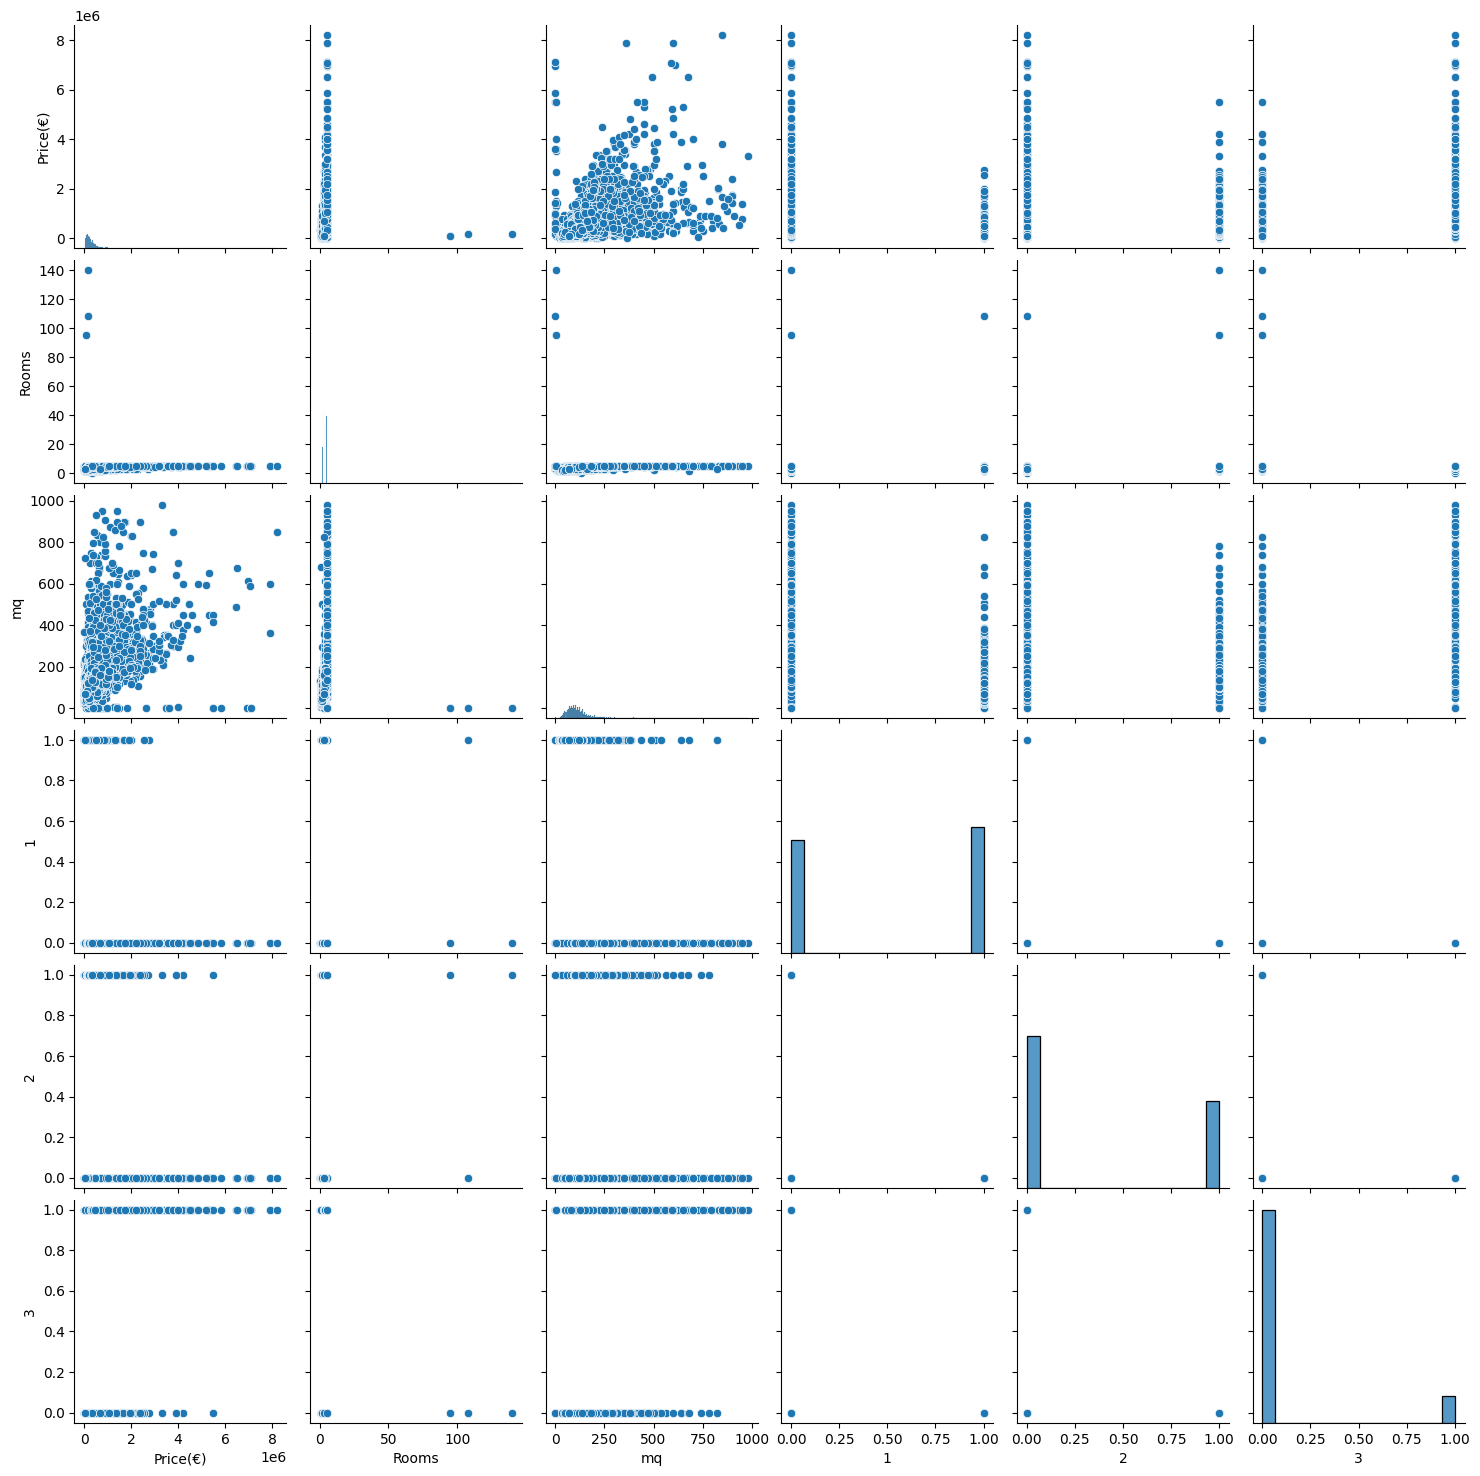

In [84]:
sns.pairplot(data);

<Axes: ylabel='Rooms'>

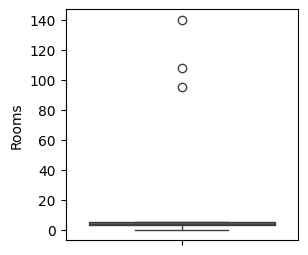

In [85]:
# on regarde des données aberrantes dans le categorie Rooms
plt.figure(figsize=(3,3))
sns.boxplot(data.Rooms)

In [86]:
data['Rooms'].describe().round(2)

count    15998.00
mean         3.63
std          1.90
min          0.00
25%          3.00
50%          4.00
75%          5.00
max        140.00
Name: Rooms, dtype: float64

In [87]:
# filtrage des données aberrantes dans le catégorie Rooms
data = data[data['Rooms']<=20]
data.shape

(15995, 6)

<Axes: ylabel='Rooms'>

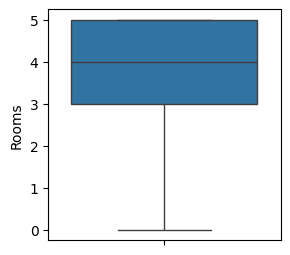

In [88]:
plt.figure(figsize=(3,3))
sns.boxplot(data.Rooms)

<Axes: xlabel='Price(€)', ylabel='Rooms'>

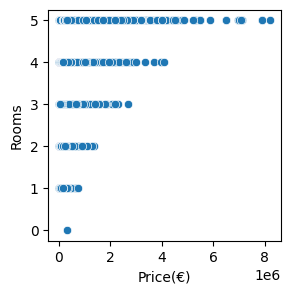

In [89]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=data['Price(€)'],y=data['Rooms'])

#### 1.3 Répartition Entrenaînement / Test (Train / Test)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Features (ou caractéristiques)
X = data.drop('Price(€)',axis=1).values
# Label (ou étiquette)
y = data['Price(€)'].values

# usamos extension values para extraer los valores en un arreglo numpy sin que altere nada en data

# Split (séparation / répartition)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)


In [92]:
X_train.shape

(12796, 5)

In [93]:
X_test.shape

(3199, 5)

In [94]:
y_train.shape

(12796,)

In [95]:
y_test.shape

(3199,)

#### 1.4 Normalisation et mise à l'echelle des données

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
scaler.fit(X_train)

MinMaxScaler()

In [99]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 2. Création du modèle

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [101]:
#model = Sequential()

#model.add(Dense(2))
#model.add(Dense(2))
#model.add(Dense(2))

In [102]:
model = Sequential()

model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

#### 2.1 Entraînement

In [103]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
  1/400 [..............................] - ETA: 2:08 - loss: 330983374848.0000

400/400 [==============================] - 1s 963us/step - loss: 319256068096.0000
Epoch 2/250
400/400 [==============================] - 0s 634us/step - loss: 319242600448.0000
Epoch 3/250
400/400 [==============================] - 0s 785us/step - loss: 319192629248.0000
Epoch 4/250
400/400 [==============================] - 0s 647us/step - loss: 319066243072.0000
Epoch 5/250
400/400 [==============================] - 0s 818us/step - loss: 318811045888.0000
Epoch 6/250
400/400 [==============================] - 0s 737us/step - loss: 318361174016.0000
Epoch 7/250
400/400 [==============================] - 0s 826us/step - loss: 317637885952.0000
Epoch 8/250
400/400 [==============================] - 0s 1ms/step - loss: 316554379264.0000
Epoch 9/250
400/400 [==============================] - 1s 2ms/step - loss: 315006943232.0000
Epoch 10/250
400/400 [==============================] - 0s 867us/step - loss: 312836882432.0000
Epoch 11/250
400/400 [==============================] - 0s 808us/

#### 2.2 Évaluation

In [104]:
model.history.history

{'loss': [319256068096.0,
  319242600448.0,
  319192629248.0,
  319066243072.0,
  318811045888.0,
  318361174016.0,
  317637885952.0,
  316554379264.0,
  315006943232.0,
  312836882432.0,
  310035611648.0,
  306388107264.0,
  301831159808.0,
  296188575744.0,
  289460486144.0,
  281674448896.0,
  272739401728.0,
  262712737792.0,
  251585445888.0,
  240054763520.0,
  228008067072.0,
  216250138624.0,
  205328154624.0,
  195629072384.0,
  187985018880.0,
  182441771008.0,
  178799853568.0,
  176406740992.0,
  174620360704.0,
  173141426176.0,
  171798298624.0,
  170471227392.0,
  169199009792.0,
  167913717760.0,
  166643335168.0,
  165384585216.0,
  164098129920.0,
  162862448640.0,
  161638907904.0,
  160413761536.0,
  159203377152.0,
  158000316416.0,
  156801122304.0,
  155616100352.0,
  154468155392.0,
  153315868672.0,
  152208424960.0,
  151123525632.0,
  150042886144.0,
  149034237952.0,
  148040761344.0,
  147094552576.0,
  146214223872.0,
  145369956352.0,
  144539172864.0,
  

In [105]:
loss = model.history.history['loss']

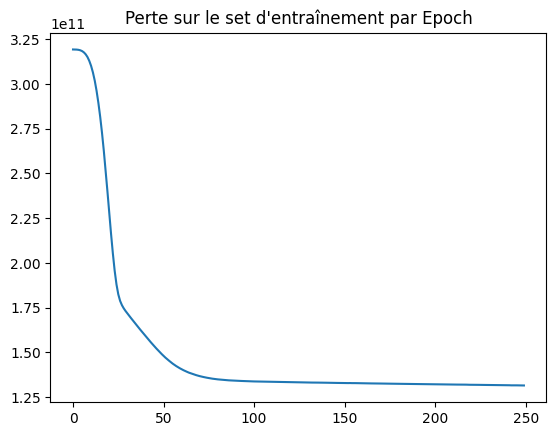

In [106]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Perte sur le set d'entraînement par Epoch");

#### Comparation de l'évaluation finale (MSE) sur le set d'entraînement et le set de test

In [107]:
model.metrics_names

['loss']

In [108]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(training_score)
print(test_score)

131507404800.0
144250863616.0


#### Évaluations complémentaires

In [109]:
test_predictions = model.predict(X_test)
test_predictions#[1:10]

100/100 [==============================] - 0s 805us/step


array([[193229.38],
       [137515.86],
       [137515.86],
       ...,
       [188417.28],
       [874187.75],
       [327341.94]], dtype=float32)

In [110]:
pred_data = pd.DataFrame(y_test, columns=['Test Y'])
pred_data

,Test Y
0,130000.0
1,109000.0
2,145000.0
3,67000.0
4,210000.0
...,...
3194,52000.0
3195,279000.0
3196,138000.0
3197,1350000.0
